In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Hitters.csv to Hitters (1).csv
Saving Advertising.csv to Advertising.csv
User uploaded file "Hitters.csv" with length 20906 bytes
User uploaded file "Advertising.csv" with length 4756 bytes


In [37]:
import pandas as pd 
import numpy as np


In [38]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


In [41]:
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [42]:
y = df["Salary"]

In [43]:
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float")

In [44]:
X_.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [45]:
X =pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [46]:
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size = 25, 
    random_state= 42
)

print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)
trainning = df.copy()

print("Trainning", trainning.shape)


X_train (238, 19)
y_train (238,)
X_test (25, 19)
y_test (25,)
Trainning (263, 20)


In [92]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
import seaborn as sns
import matplotlib.pyplot as plt

pca = PCA()

In [53]:
X_reduced_train = pca.fit_transform(scale(X_train))

In [54]:
X_reduced_train[0:1,:]

array([[-3.68372810e+00,  1.11542169e+00,  2.88235625e-01,
        -1.32712756e+00,  9.20121044e-01, -7.75362796e-01,
         4.39280945e-02,  5.61970749e-02,  3.54688894e-02,
         3.72743259e-01,  5.45144107e-02,  3.87061784e-01,
         1.17579010e-01, -2.14810538e-01,  2.26776230e-01,
         1.90088184e-01, -6.31613091e-04, -2.51852266e-02,
        -4.45102554e-03]])

In [55]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)[0:5]

array([39.71, 60.27, 70.73, 79.02, 84.27])

In [58]:
lm = LinearRegression()

In [60]:
pcr_model = lm.fit(X_reduced_train, y_train)

In [61]:
pcr_model.coef_

array([ 109.08425814,  -13.36527046,   24.42934096,  -41.75062558,
        -61.5232105 ,   59.17285481,   14.07187428,  -20.1980197 ,
         37.21442399,   98.00062074,   36.27630937,    1.43413755,
         51.3047003 , -250.85480408,   28.89167581,  402.02008772,
       -290.26864361,  734.62630172, -117.35371967])

In [63]:
y_pred = pcr_model.predict(X_reduced_train)

In [65]:
y_pred[0:5]

array([247.44142334, 872.48802503, 283.39124767, 362.90041471,
        93.49958195])

In [68]:
np.sqrt(mean_squared_error(y_train, y_pred))

308.0974318300984

In [69]:
df["Salary"].mean()

535.9258821292775

In [72]:
r2_score(y_train, y_pred)

0.5497040260906321

In [73]:
pca2 = PCA()

In [77]:
X_reduced_test = pca2.fit_transform(scale(X_test))

In [78]:
y_pred = pcr_model.predict(X_reduced_test)

In [80]:
np.sqrt(mean_squared_error(y_test, y_pred))

437.1025307000797

In [86]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:4], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:4])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

447.83928462985176


In [102]:
cv_10 = model_selection.KFold(n_splits= 10, 
                              shuffle= True,
                              random_state= 1)

In [103]:
RMSE = []

In [104]:
for i in np.arange(1, X_reduced_train.shape[1] +1):
    score = np.sqrt(-1*model_selection.cross_val_score(lm,
                                                       X_reduced_train[:,:i],
                                                       y_train.ravel(),
                                                       cv=cv_10,
                                                       scoring= "neg_mean_squared_error").mean())
    RMSE.append(score)

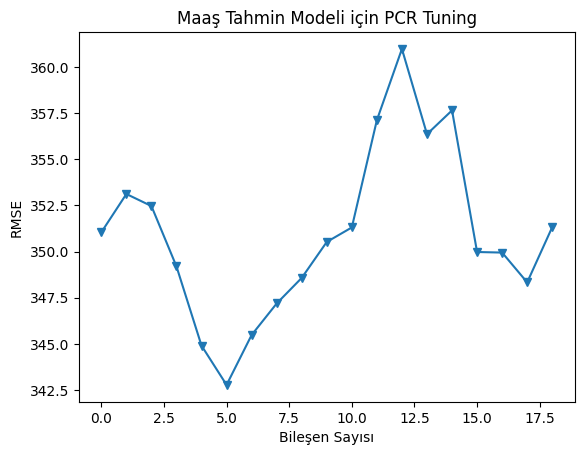

In [105]:
plt.plot(RMSE, "-v")
plt.xlabel("Bileşen Sayısı")
plt.ylabel("RMSE")
plt.title("Maaş Tahmin Modeli için PCR Tuning");

In [106]:
pcr_model = lm.fit(X_reduced_train[:,0:6], y_train)

In [107]:
y_pred = pcr_model.predict(X_reduced_train[:,0:6])
print(np.sqrt(mean_squared_error(y_train, y_pred)))

331.2437789656201


In [109]:
y_pred = pcr_model.predict(X_reduced_test[:,0:6])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

431.57902365620316
